# Classification Codes Using DT

In [1]:
# Import libraries
import sklearn
import pandas as pd
import numpy as np
import matplotlib
import pickle
import warnings

In [3]:
# Ignore warnings
warnings.filterwarnings("ignore")

In [5]:
# Import the dataset from the table in csv format
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
# Convert alphabetical values in the dataset into numerical values
dataset = pd.get_dummies(dataset, dtype = int, drop_first = True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [9]:
# Exclude the colum named user ID because it is a redundant variable and does not contribute to the solution 
dataset = dataset.drop('User ID', axis = 1)

In [11]:
# Find the number of output variables classified as O and 1
dataset['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [13]:
# Get the headings of the dataset
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [15]:
# Specify the input values or independent variables in the dataset
Input = dataset[['Age', 'EstimatedSalary', 'Gender_Male']]
Input

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [17]:
# Find the number of different input variables and the maximum count of the input variables
Input.shape

(400, 3)

In [19]:
# Specify the output values or dependent variables in the dataset
Output = dataset[['Purchased']]
Output

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [21]:
# Split the variables in the dataset into training set and test set and also assign the size of the test set
from sklearn.model_selection import train_test_split as tts
X_train, X_test, Y_train, Y_test = tts(Input, Output, test_size = 0.3, random_state = 0)

In [23]:
# Get the values of the input training set
X_train

,Age,EstimatedSalary,Gender_Male
92,26,15000,1
223,60,102000,1
234,38,112000,0
232,40,107000,1
377,42,53000,0
...,...,...,...
323,48,30000,0
192,29,43000,1
117,36,52000,1
47,27,54000,0


In [25]:
# Model creation and fit the model
from sklearn.tree import DecisionTreeClassifier as DTC
Classifier = DTC(criterion='entropy', random_state = 0)
Classifier = Classifier.fit(X_train, Y_train)

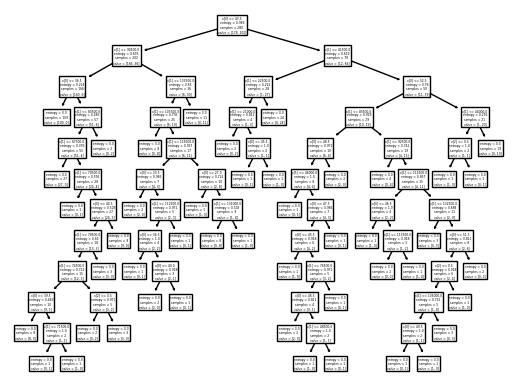

In [27]:
from matplotlib import pyplot as plt
from sklearn import tree
tree.plot_tree(Classifier)
plt.show()

In [28]:
# Predict output using the data from input variables
Y_pred = Classifier.predict(X_test)

In [29]:
# Generate confusion matrix from output variables
from sklearn.metrics import confusion_matrix as cm
cm = cm(Y_test, Y_pred)
print (cm)

[[71  8]
 [ 3 38]]


In [30]:
# Generate report of the confusion matrix
from sklearn.metrics import classification_report as cr
cr = cr(Y_test, Y_pred)
print (cr)

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        79
           1       0.83      0.93      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120



In [31]:
filename = "Pythoncode_DTC.sav"
pickle.dump (Classifier, open(filename, "wb"))

In [32]:
load_model=pickle.load(open("Pythoncode_DTC.sav", "rb"))
Result = load_model.predict([[40,30000,1]])
Result

array([0], dtype=int64)